In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


c:\Users\linyo\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
import os

In [4]:
#!pip list

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)


In [7]:
tf.config.list_physical_devices('GPU')

[]

In [8]:
!pip install opencv-python


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Python311\python.exe -m pip install --upgrade pip


In [9]:
pip install opencv-contrib-python

     ---------------------------------------- 0.0/45.3 MB ? eta -:--:--
     ---------------------------------------- 0.5/45.3 MB 9.4 MB/s eta 0:00:05
      --------------------------------------- 1.0/45.3 MB 12.2 MB/s eta 0:00:04
     - -------------------------------------- 1.6/45.3 MB 12.9 MB/s eta 0:00:04
     -- ------------------------------------- 2.4/45.3 MB 13.9 MB/s eta 0:00:04
     -- ------------------------------------- 3.1/45.3 MB 13.3 MB/s eta 0:00:04
     --- ------------------------------------ 3.7/45.3 MB 13.2 MB/s eta 0:00:04
     --- ------------------------------------ 4.2/45.3 MB 13.5 MB/s eta 0:00:04
     ---- ----------------------------------- 4.8/45.3 MB 13.2 MB/s eta 0:00:04
     ---- ----------------------------------- 5.5/45.3 MB 12.9 MB/s eta 0:00:04
     ----- ---------------------------------- 5.9/45.3 MB 12.9 MB/s eta 0:00:04
     ----- ---------------------------------- 6.3/45.3 MB 12.7 MB/s eta 0:00:04
     ------ --------------------------------- 7.1


[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import cv2
import imghdr

In [11]:
data_dir = 'data' 

In [12]:
image_exts = ['png']

In [13]:
os.listdir(data_dir)

['ankylosaurus', 'brontosaurus', 'pterodactyl', 'trex', 'triceratops']

In [14]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 200 files belonging to 5 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
batch = data_iterator.next()


In [17]:
# 0 = ankylosaurus
# 1 = brontosaurus
# 2 = pterodactyl
# 3 = trex
# 4 = triceratops

batch[1]

array([2, 1, 4, 4, 0, 1, 4, 2, 0, 2, 0, 3, 4, 1, 1, 1, 1, 2, 3, 3, 3, 3,
       1, 2, 4, 1, 0, 4, 0, 4, 4, 2])

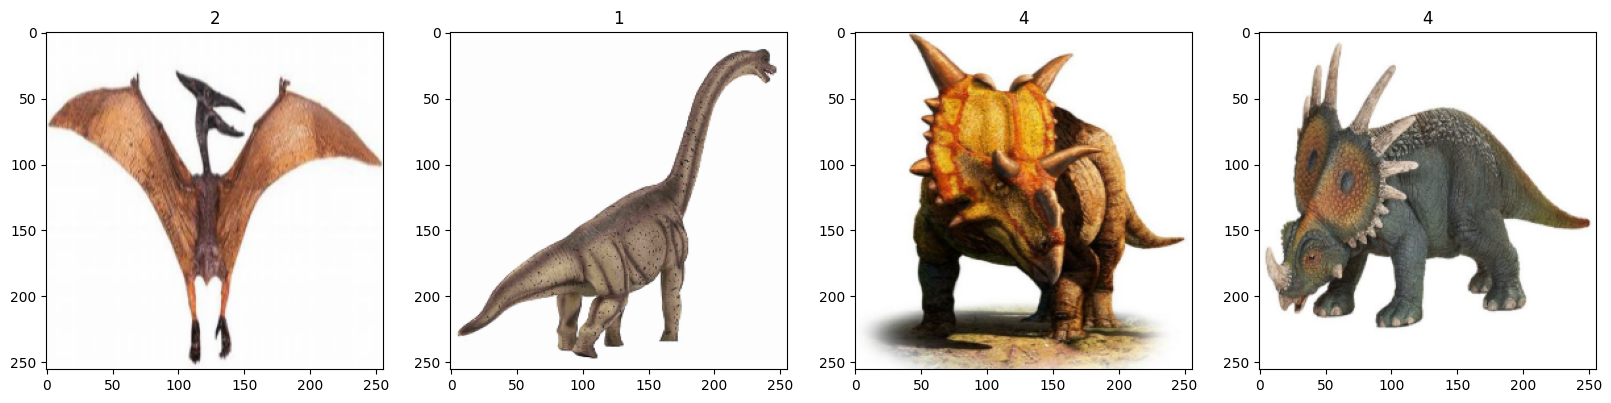

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [19]:
data = data.map(lambda x,y: (x/255, y))

In [20]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [21]:
len(data)

7

In [22]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1


In [23]:
len(data)

7

In [105]:
data = data.shuffle(buffer_size=4)

In [106]:
# data should be shuffled
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [107]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [108]:
model = Sequential()

In [109]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [110]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [111]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 30, 30, 16)       

In [112]:
hist = model.fit(train, epochs=20, validation_data=val)


Epoch 1/20
4/4 [==============================] - 2s 421ms/step - loss: 0.0000e+00 - accuracy: 0.2109 - val_loss: 0.0000e+00 - val_accuracy: 0.2656
Epoch 2/20
4/4 [==============================] - 1s 334ms/step - loss: 0.0000e+00 - accuracy: 0.2344 - val_loss: 0.0000e+00 - val_accuracy: 0.1250
Epoch 3/20
4/4 [==============================] - 1s 341ms/step - loss: 0.0000e+00 - accuracy: 0.2109 - val_loss: 0.0000e+00 - val_accuracy: 0.1750
Epoch 4/20
4/4 [==============================] - 1s 287ms/step - loss: 0.0000e+00 - accuracy: 0.2019 - val_loss: 0.0000e+00 - val_accuracy: 0.2031
Epoch 5/20
4/4 [==============================] - 1s 327ms/step - loss: 0.0000e+00 - accuracy: 0.2188 - val_loss: 0.0000e+00 - val_accuracy: 0.1000
Epoch 6/20
4/4 [==============================] - 1s 330ms/step - loss: 0.0000e+00 - accuracy: 0.2266 - val_loss: 0.0000e+00 - val_accuracy: 0.2656
Epoch 7/20
4/4 [==============================] - 1s 334ms/step - loss: 0.0000e+00 - accuracy: 0.2109 - val_loss

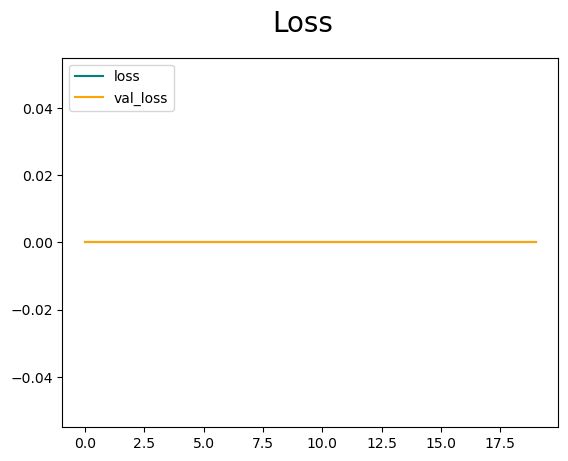

In [113]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()
